# Clustering
The aim of clustering is to auomatically find clusters in unlabeled data.

[[ -5.67782611   5.38978775]
 [-14.29606546  -7.02942048]
 [ 10.6618369   -0.2496506 ]
 [ -3.58749504   4.98962002]
 [ -3.57628891  -8.00231687]
 [ -4.5962037   -9.23434011]
 [ -1.79809528   7.05935819]
 [ -6.13587092  -7.01826439]
 [  1.70392266   1.5816261 ]
 [ -8.59787828  -6.80835921]]
[3 2 1 0 2 2 3 2 1 2]


[]

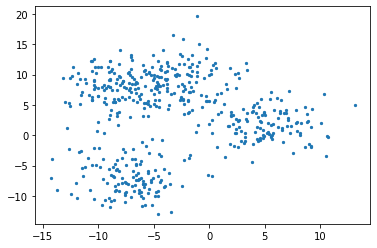

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


# automatically generate random dataset
features, true_labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=2.75,
    random_state=42
)

print(features[:10])
print( true_labels[:10])
fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], s=5)
plt.plot()
# sns.scatterplot(x=features[:,0], y=features[:,1], hue=true_labels)



In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(features)

print("Sum of Errors:", kmeans.inertia_, "\nIterations until convergence:", kmeans.n_iter_)

# Inertia can be used to find the optimal number of centroids

Sum of Errors: 6511.401872709036 
Iterations until convergence: 12


[]

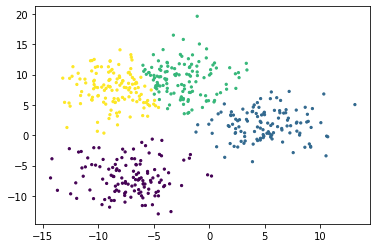

In [3]:
fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], s=5, c=kmeans.labels_)
plt.plot()

In [4]:
# Dimensionality Reduction

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)


print(pca.explained_variance_ratio_)




[0.99244289 0.00755711]


## Visualizing 4D data
### Idea 1

3D Plot with 4th dimension encoded as colour / point size / symbol.

In [6]:

#run this to enable 3d plots
# %matplotlib widget
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


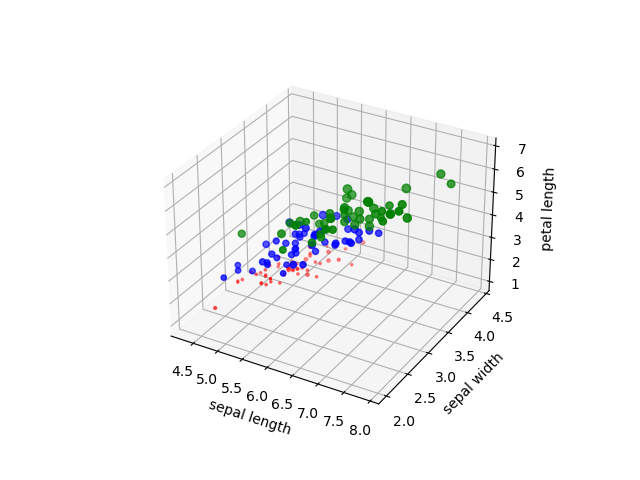

In [7]:

%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['sepal length']
y = df['sepal width']
z = df['petal length']
s = df['petal width']
c = df['target']
colors = {'Iris-setosa':"red", 'Iris-versicolor':"blue", 'Iris-virginica':"green"}
print(c.unique())

ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
ax.set_zlabel("petal length")

ax.scatter(x, y, z, s = df['petal width']*15 , c=c.map(colors))

plt.show()

## Idea 2: Principal Component Analysis 
Principal Component Analysis (PCA) attempts to identify the principal components (called "eigenvectors") that best describe the variance in the data using these PCs, we can visualize points in a lower dimension (*d*) by only using a combination of the first *d* PCs.

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


Calculate the variance explained by each PC:

In [9]:

pca = PCA(n_components=4)
X_r = pca.fit(X).transform(X)

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
sum (pca.explained_variance_ratio_)


explained variance ratio (first two components): [0.92461872 0.05306648 0.01710261 0.00521218]


1.0

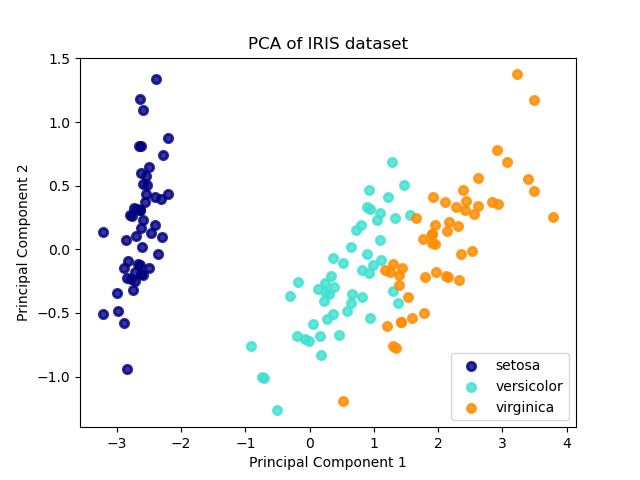

In [10]:


plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2') 
"""
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")
"""
plt.show()